In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import sys

In [16]:
df=pd.read_csv('keplerstellar_2025.csv')
df.head()

,st_delivname,kepid,tm_designation,ra,dec,kepmag,teff,teff_err1,teff_err2,teff_prov,...,mass_err2,dens,dens_err1,dens_err2,prov_sec,nconfp,nkoi,ntce,st_quarters,st_vet_date
0,q1_q17_dr25_supp_stellar,757076,2MASS J19240929+3635532,291.03873,36.598129,11.678,5160,171.0,-156.0,PHO1,...,-0.4750,0.06246,1.8090,-0.03608,DSEP,0,0,0,NaN,2018-01-06 0
1,q1_q16_stellar,757076,2MASS J19240929+3635532,291.03873,36.598129,11.678,5160,138.0,-163.0,PHO1,...,-0.4012,0.06246,0.1124,-0.04001,DSEP,0,0,0,1.111111e+16,2013-12-03 0
2,q1_q17_dr24_stellar,757076,2MASS J19240929+3635532,291.03873,36.598129,11.678,5160,138.0,-163.0,PHO1,...,-0.4010,0.06246,0.1124,-0.04001,DSEP,0,0,0,1.111111e+16,2015-01-15 0
3,q1_q12_stellar,757076,2MASS J19240929+3635532,291.03873,36.598129,11.678,5138,83.0,-83.0,Pinsonneault,...,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,2013-03-27 0
4,q1_q17_dr25_stellar,757076,2MASS J19240929+3635532,291.03873,36.598129,11.678,5160,171.0,-156.0,PHO1,...,-0.4750,0.06246,1.8090,-0.03608,DSEP,0,0,0,1.111111e+16,2017-03-23 0


In [17]:
# Quick overview
print(df.shape)
print(df.head())
print(df.describe())

(990244, 33)
               st_delivname   kepid           tm_designation         ra  \
0  q1_q17_dr25_supp_stellar  757076  2MASS J19240929+3635532  291.03873   
1            q1_q16_stellar  757076  2MASS J19240929+3635532  291.03873   
2       q1_q17_dr24_stellar  757076  2MASS J19240929+3635532  291.03873   
3            q1_q12_stellar  757076  2MASS J19240929+3635532  291.03873   
4       q1_q17_dr25_stellar  757076  2MASS J19240929+3635532  291.03873   

         dec  kepmag  teff  teff_err1  teff_err2     teff_prov  ...  \
0  36.598129  11.678  5160      171.0     -156.0          PHO1  ...   
1  36.598129  11.678  5160      138.0     -163.0          PHO1  ...   
2  36.598129  11.678  5160      138.0     -163.0          PHO1  ...   
3  36.598129  11.678  5138       83.0      -83.0  Pinsonneault  ...   
4  36.598129  11.678  5160      171.0     -156.0          PHO1  ...   

   mass_err2     dens  dens_err1 dens_err2  prov_sec  nconfp  nkoi ntce  \
0    -0.4750  0.06246     1.8090  

# 1. Distribution of Stellar Temperatures

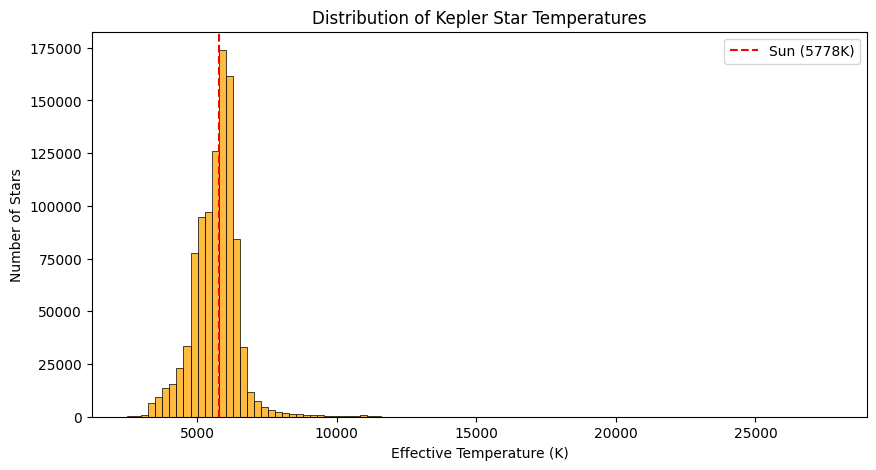

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(df['teff'], bins=100, color='orange')
plt.axvline(5778, color='red', linestyle='--', label="Sun (5778K)")
plt.xlabel("Effective Temperature (K)")
plt.ylabel("Number of Stars")
plt.title("Distribution of Kepler Star Temperatures")
plt.legend()
plt.show()

# 2. Stellar Radius vs Temperature (H-R like diagram)


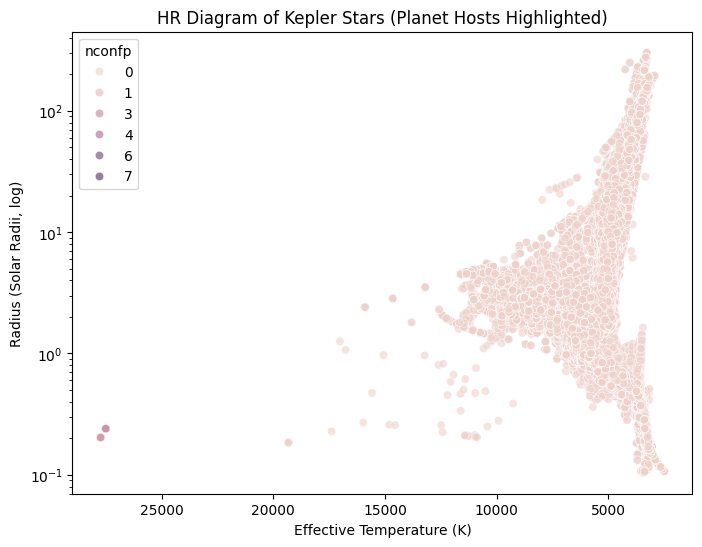

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="teff", y="radius", hue="nconfp", alpha=0.6)
plt.gca().invert_xaxis()  # astronomy convention: hotter stars on the left
plt.yscale("log")
plt.xlabel("Effective Temperature (K)")
plt.ylabel("Radius (Solar Radii, log)")
plt.title("HR Diagram of Kepler Stars (Planet Hosts Highlighted)")
plt.show()

As the Radius of Stars increases then we can see a drop in temperature values. 

# 3. Metallicity vs Planet Count


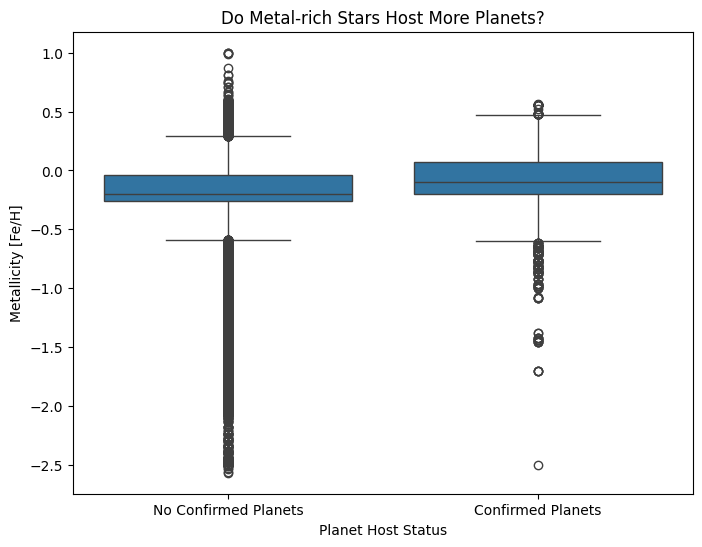

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x=(df['nconfp']>0), y=df['feh'])
plt.xticks([0,1], ["No Confirmed Planets", "Confirmed Planets"])
plt.xlabel("Planet Host Status")
plt.ylabel("Metallicity [Fe/H]")
plt.title("Do Metal-rich Stars Host More Planets?")
plt.show()

the plot shows that stars with confirmed planets tend to have a slightly higher median metallicity (indicated by the horizontal line inside the box) than stars with no confirmed planets. The metallicity is represented by the [Fe/H] value, which is a measure of the iron content relative to hydrogen compared to the Sun. While the difference is not vast, the box for "Confirmed Planets" is centered slightly higher on the [Fe/H] axis than the box for "No Confirmed Planets," suggesting a modest correlation where more metal-rich stars are slightly more likely to host detectable planets. The box width itself is narrow, indicating the bulk of the data (the middle 50% or interquartile range) for both groups is quite clustered in [Fe/H], though the "No Confirmed Planets" group shows a much wider scatter with many more extreme low-metallicity outliers.

 # Histogram of number of planets per star


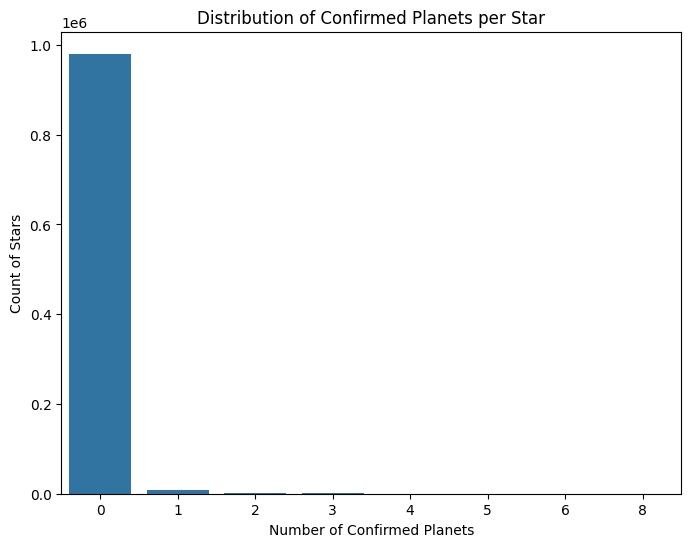

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x="nconfp", data=df)
plt.xlabel("Number of Confirmed Planets")
plt.ylabel("Count of Stars")
plt.title("Distribution of Confirmed Planets per Star")
plt.show()

it clearly demonstrates that the vast majority of stars in the dataset do not have any confirmed planets (represented by the huge bar at 0 on the x-axis, which is close to 10^6 stars). A very small number of stars have one confirmed planet, and an even smaller number have two, three, or more. The chart highlights the rarity of finding stars with confirmed planets compared to the overall population, and it also shows that most of the stars that do have planets typically only have one or a few. 

# Correlation Heatmap

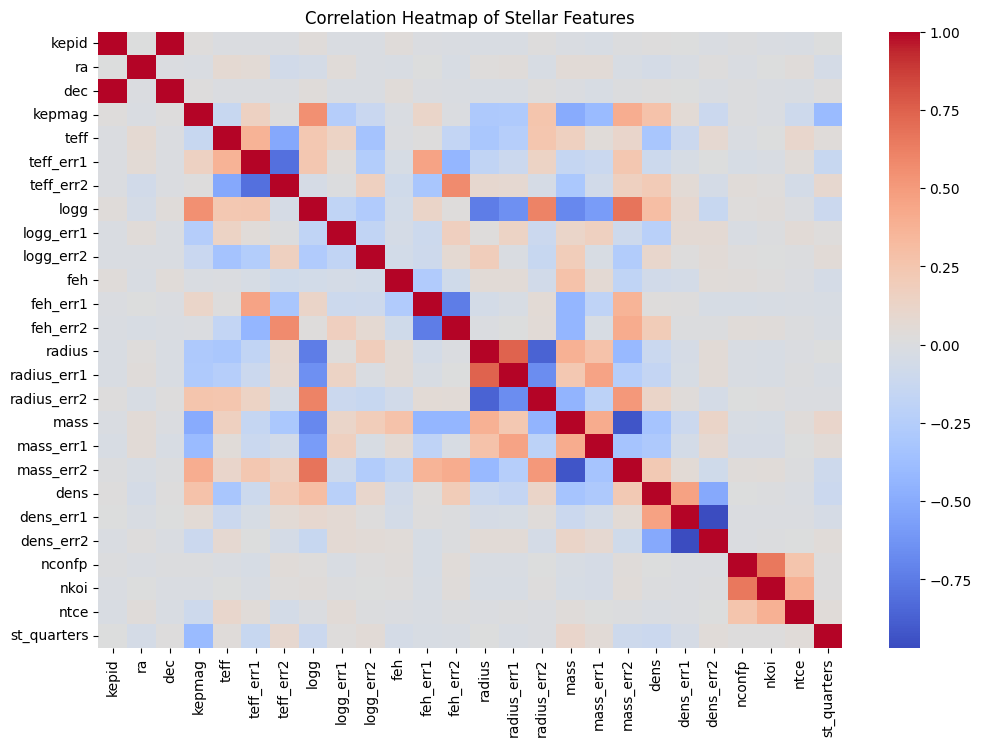

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Stellar Features")
plt.show()


# Pairplot of Key Features

# Radius vs Mass (with Planet Hosts Highlighted)

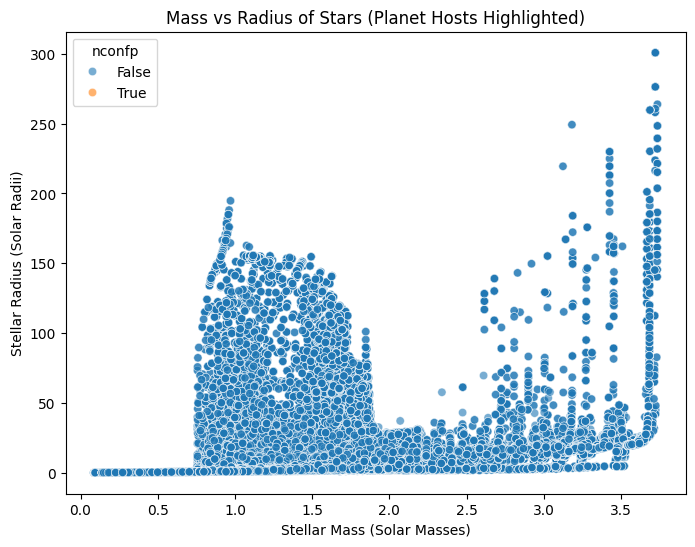

In [23]:
# Check if larger stars host more planets.

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="mass", y="radius", hue=(df["nconfp"]>0), alpha=0.6)
plt.xlabel("Stellar Mass (Solar Masses)")
plt.ylabel("Stellar Radius (Solar Radii)")
plt.title("Mass vs Radius of Stars (Planet Hosts Highlighted)")
plt.show()


# Surface Gravity vs Temperature

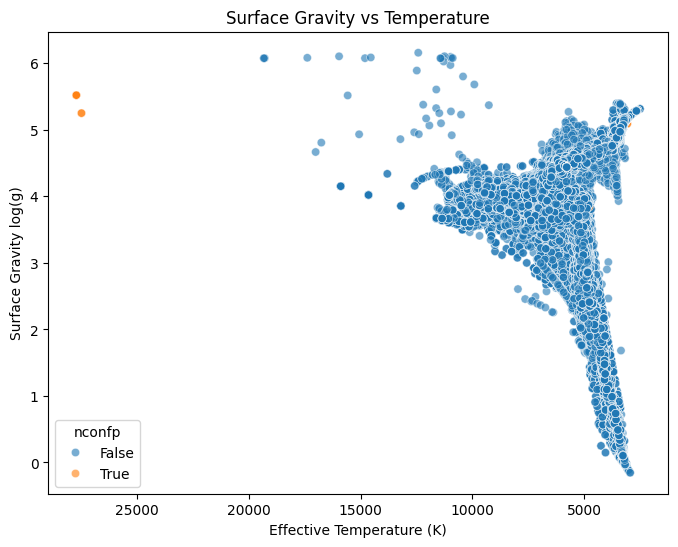

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="teff", y="logg", hue=(df["nconfp"]>0), alpha=0.6)
plt.gca().invert_xaxis()
plt.xlabel("Effective Temperature (K)")
plt.ylabel("Surface Gravity log(g)")
plt.title("Surface Gravity vs Temperature")
plt.show()


# Density vs Radius (Planet Hosting Stars Highlighted)

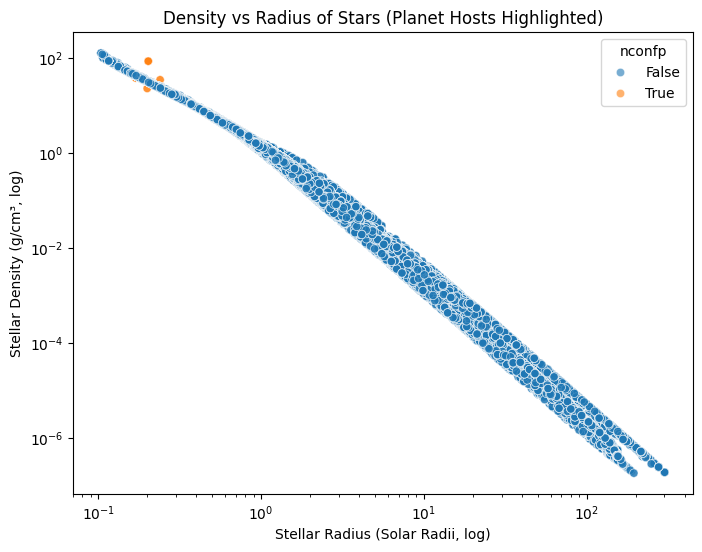

In [25]:
# Low-density stars are giants, high-density are dwarfs.

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="radius", y="dens", hue=(df["nconfp"]>0), alpha=0.6)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Stellar Radius (Solar Radii, log)")
plt.ylabel("Stellar Density (g/cm³, log)")
plt.title("Density vs Radius of Stars (Planet Hosts Highlighted)")
plt.show()


# Counts of Planets by Star Type
Split stars into bins based on temperature (cool, Sun-like, hot).

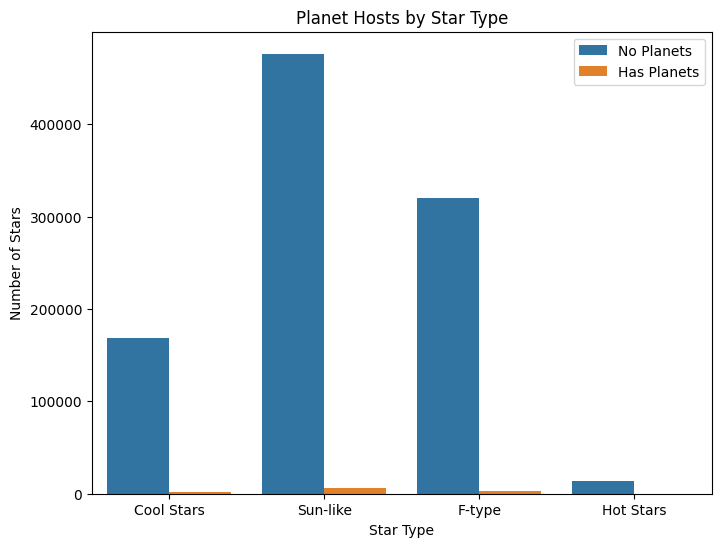

In [26]:
df["star_type"] = pd.cut(df["teff"], 
                         bins=[2500,5000,6000,7500,10000], 
                         labels=["Cool Stars","Sun-like","F-type","Hot Stars"])

plt.figure(figsize=(8,6))
sns.countplot(x="star_type", hue=(df["nconfp"]>0), data=df)
plt.xlabel("Star Type")
plt.ylabel("Number of Stars")
plt.title("Planet Hosts by Star Type")
plt.legend(["No Planets","Has Planets"])
plt.show()


# Planets per Star vs Stellar Radius

Do larger stars host more planets?

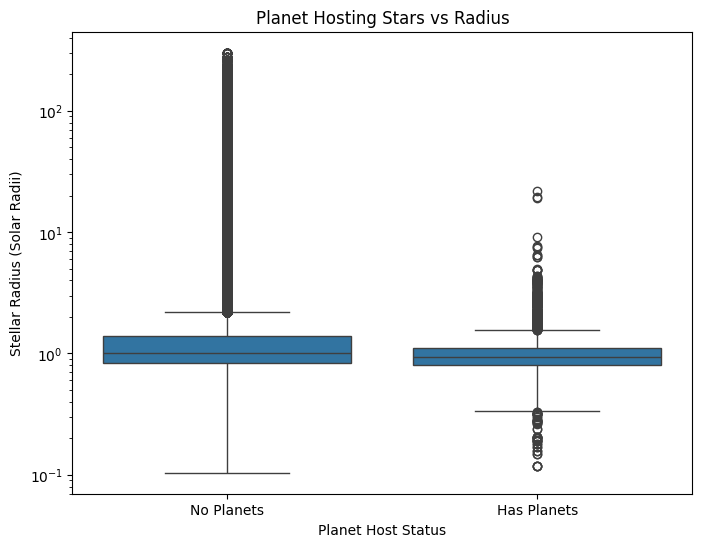

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(x=(df["nconfp"]>0), y=df["radius"])
plt.xticks([0,1], ["No Planets", "Has Planets"])
plt.xlabel("Planet Host Status")
plt.ylabel("Stellar Radius (Solar Radii)")
plt.title("Planet Hosting Stars vs Radius")
plt.yscale("log")
plt.show()


## Multi-feature Importance

use a simple Random Forest feature importance plot to see which stellar features matter most for predicting if a star hosts planets.

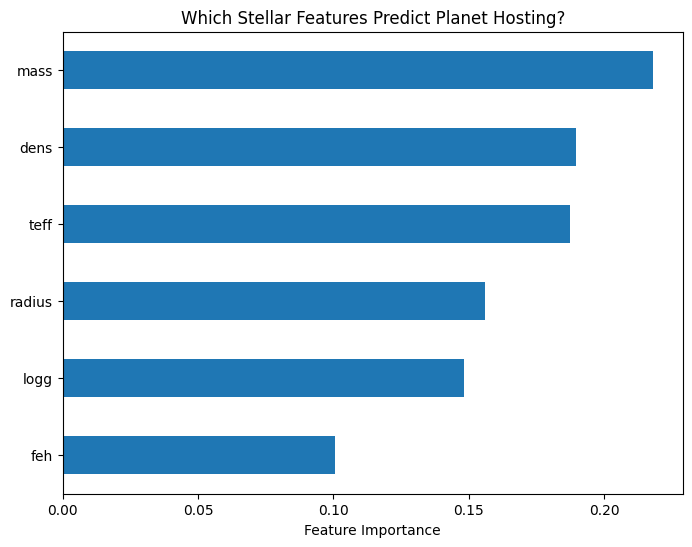

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Drop rows with NaNs for simplicity
df_clean = df.dropna(subset=["teff","logg","feh","radius","mass","dens","nconfp"])
X = df_clean[["teff","logg","feh","radius","mass","dens"]]
y = (df_clean["nconfp"]>0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,6))
importances.plot(kind="barh")
plt.xlabel("Feature Importance")
plt.title("Which Stellar Features Predict Planet Hosting?")
plt.show()
